# 1. Introduction

This data analysis project was developed as part of my internship with CodSoft. I chose the Credit Card Fraud Detection dataset due to my strong interest in the banking and commercial sector. This interest is rooted in my professional background, having worked for ten years in the commercial department of a bank, where I was responsible for assessing clients repayment capacity. As a result, this project is particularly relevant to my experience and contributes significantly to the enrichment of my knowledge in the field.

The primary objective of this dataset is to predict fraudulent credit card transactions, a task that has become increasingly critical in the financial industry due to the growing prevalence of digital payments. The entire project was carried out using Python within a Jupyter Notebook environment, allowing for efficient data manipulation, analysis, and model implementation.

# 2. Dataset Description

The dataset used for this project is the Credit Card Fraud Detection dataset, which was obtained from Kaggle. It contains 284,807 transactions made by European cardholders over a two-day period in September 2013. The dataset is highly imbalanced, with only 492 fraudulent transactions, representing approximately 0.172% of all transactions.

All features in the dataset, except for 'Time' and 'Amount', have been transformed using Principal Component Analysis (PCA) for confidentiality reasons, and are labeled as V1 through V28. The 'Class' variable is the target feature, where 1 indicates a fraudulent transaction, and 0 indicates a legitimate one.

Key characteristics of the dataset include:

*Imbalanced classes, which pose a challenge for classification models.

*Anonymized features, which prevent feature-level interpretation but simulate real-world privacy constraints.

*No missing values, which simplifies preprocessing.

This dataset provides a practical scenario for developing and evaluating fraud detection models in the financial sector.

# 3. Data Dictionary

* **Time** : Number of seconds elapsed between this transaction and the first transaction in the dataset.
* **V1-V28** : Principal components obtained with PCA. Dimensionality reduction to protect user identities and sensitive features.
* **Amount** : Transaction amount.
* **Class** : 1 for fraudulent transactions and  0 otherwise

# 4. Data Preprocessing

The first step in the data preprocessing stage involves importing the essential Python libraries required for data manipulation, analysis, and visualization. The libraries used include:

**Pandas**: This library is fundamental for data manipulation and analysis. It provides data structures such as DataFrames, which are ideal for handling tabular data. Pandas allows for efficient reading, cleaning, and transformation of datasets.

**NumPy**: NumPy is used for numerical computations. It offers support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions. It is particularly useful for optimizing performance when performing element-wise operations on arrays.

**Seaborn**: Built on top of Matplotlib, Seaborn is a powerful visualization library that simplifies the creation of informative and attractive statistical graphics. It is used in this project to better understand the distribution of data and relationships between variables, especially in the exploratory data analysis (EDA) stage.

Importing these libraries is a necessary initial step, as they provide the core tools for exploring and preparing the data prior to building machine learning models.

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

After importing the necessary libraries, the next step is to load the dataset into the environment. This is done using Pandas, which allows the CSV file to be read and stored as a DataFrame for further analysis. The dataset is imported as follows:

In [2]:
#Importing Dataset
df= pd.read_csv('creditcard.csv')

# 5. Exploratory Data Analysis

Once loaded, initial inspection commands such as df.shape, df.columns, df.head(), df.info(), and df.describe() are used to obtain a general understanding of the structure and contents of the dataset. This includes checking the number of entries, data types, presence of null values, and basic statistical summaries of each feature.

This step ensures that the data is properly imported and sets the foundation for further exploration and cleaning.

In [3]:
df.shape

(284807, 31)

In [4]:
df. columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

Upon importing the dataset, an initial inspection reveals that it contains 284,807 rows and 31 columns, representing individual credit card transactions and their associated features. The column names include:

**Time**: Indicates the seconds elapsed between the first transaction and the current one.

**‘V1’ through ‘V28’**: These are the result of a Principal Component Analysis (PCA) transformation applied to the original features to preserve confidentiality. Their exact meanings are unknown, but they represent components that capture the most variance in the original data.

**Amount**: The transaction amount.

**Class**: The target variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate one.

In [6]:
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Notably, all features in the dataset are numerical, which significantly facilitates the development of machine learning models. Since no categorical encoding or transformation is required, this allows for a more direct and efficient application of algorithms such as Random Forest or Gradient Boosting classifiers.

This foundational understanding of the dataset helps shape the direction of subsequent stages, including data cleaning, exploratory analysis, and model development.


To improve data readability and facilitate the analysis process, the columns were reordered such that ‘Time’, ‘Amount’, and ‘Class’ appear at the beginning of the DataFrame. These columns are particularly important for both understanding transaction context and for model training, as ‘Time’ and ‘Amount’ are the only non-anonymized features, and ‘Class’ is the target variable.

This reordering step allows for easier access to key variables during the exploratory analysis and modeling phases, especially when visualizing or evaluating model predictions.

In [7]:
# Reorder columns: move 'Time', 'Amount', and 'Class' to the front
columns = ['Time', 'Amount', 'Class'] + [col for col in df.columns if col not in ['Time', 'Amount', 'Class']]
df = df[columns]

# Check the new column order
df.head()

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [8]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

An essential first step in the exploratory data analysis is to examine the distribution of the target variable, ‘Class’, which indicates whether a transaction is fraudulent (1) or legitimate (0). Upon inspection, it becomes immediately evident that the dataset is highly imbalanced.

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This reveals that fraudulent transactions represent only a very small fraction of the total dataset, approximately 0.172%. The vast majority of transactions are legitimate, which presents a significant challenge for most classification algorithms. If not addressed, this class imbalance can lead to models that are biased toward predicting the majority class, thereby failing to correctly identify fraudulent activities.

This insight underscores the importance of employing appropriate evaluation metrics (such as precision, recall, and F1-score) and possibly implementing resampling techniques (e.g., oversampling the minority class or using algorithms that are robust to imbalance) during the model development stage.

## 5.1 Data Cleaning

Before proceeding with feature engineering or model training, it is essential to ensure the integrity and quality of the data. One of the initial steps in this phase is to check for and remove any duplicate entries, as these can introduce bias or redundancy into the model.

Duplicate records may occur due to system errors or data collection issues, and their presence can artificially inflate the representation of certain patterns in the data, especially in an already imbalanced dataset.

To check for duplicates, the following code is used:

In [10]:
print(df.duplicated().sum())

1081


After checking for duplicate entries, it was found that there are 1,081 duplicate rows in the dataset. These duplicates likely arise from repeated transactions being recorded, which could distort the results of the analysis.

In [11]:
df.isna().sum()

Time      0
Amount    0
Class     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
dtype: int64

In [12]:
df.isna().sum().sum()

0

It was confirmed that the dataset contains no missing values in any of the features. This simplifies the preprocessing process, as there is no need for imputation or handling of missing data.

Although we have detected 1,081 duplicate rows, it is important to inspect these rows more closely to understand their nature and determine whether they should be removed or handled differently. Duplicated entries can significantly impact the performance of machine learning models, especially when dealing with imbalanced datasets, as they may artificially inflate the number of certain transactions.

In [13]:
# Get duplicated rows (excluding the first occurrence)
duplicated_rows = df[df.duplicated(keep=False)]  # keep=False shows all the copies

print(f"Number of duplicated rows: {len(duplicated_rows)}")
duplicated_rows.head()

Number of duplicated rows: 1854


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
32,26.0,6.14,0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,...,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307
33,26.0,6.14,0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,...,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307
34,26.0,1.77,0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,...,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427
35,26.0,1.77,0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,...,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427
112,74.0,1.18,0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,...,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192


In [14]:
# Count how many times each duplicated row appears
duplicate_counts = duplicated_rows.value_counts().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values(by='count', ascending=False)

duplicate_counts.head()

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,count
0,163152.0,1.51,0,-1.203617,1.574009,2.889277,3.381404,1.538663,3.698747,0.560211,...,1.385597,-0.366727,0.522223,-0.357329,-0.870174,-0.134166,0.327019,-0.042648,-0.855262,18
1,163152.0,7.56,0,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,...,1.375790,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,18
2,170731.0,0.76,0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,...,-0.430560,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,9
3,43153.0,0.76,0,-2.086016,2.203265,1.654339,2.941050,-1.683045,0.529728,-1.352162,...,0.079002,0.216444,0.567241,-0.035345,0.370201,0.157378,0.440341,0.210230,0.090558,9
4,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,6


In [15]:
# Show rows that are duplicated more than once
more_than_twice = duplicate_counts[duplicate_counts['count'] > 2]
more_than_twice.head()

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,count
0,163152.0,1.51,0,-1.203617,1.574009,2.889277,3.381404,1.538663,3.698747,0.560211,...,1.385597,-0.366727,0.522223,-0.357329,-0.870174,-0.134166,0.327019,-0.042648,-0.855262,18
1,163152.0,7.56,0,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,...,1.375790,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,18
2,170731.0,0.76,0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,...,-0.430560,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,9
3,43153.0,0.76,0,-2.086016,2.203265,1.654339,2.941050,-1.683045,0.529728,-1.352162,...,0.079002,0.216444,0.567241,-0.035345,0.370201,0.157378,0.440341,0.210230,0.090558,9
4,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,6


In [16]:
# Check class distribution within duplicated rows
duplicated_class_counts = duplicated_rows['Class'].value_counts()
print(duplicated_class_counts)

0    1822
1      32
Name: Class, dtype: int64


Upon inspecting the duplicated rows, we observed that the class distribution within these rows is highly imbalanced, similar to the overall dataset. Specifically, there are 1,822 duplicated rows with 'Class' = 0 (legitimate transactions) and only 32 rows with 'Class' = 1 (fraudulent transactions). This further emphasizes the already severe imbalance in the dataset, as the fraudulent transactions are vastly outnumbered by legitimate ones.

This distribution suggests that the removal of these duplicate rows may lead to a slight reduction in the number of fraudulent transactions (Class 1), which could impact the model’s ability to detect fraud. Therefore, careful consideration is needed in deciding whether to remove these duplicates entirely or address the imbalance by applying appropriate techniques such as oversampling the minority class or using class weights during model training.

In [17]:
# Show only duplicated fraudulent transactions
fraud_duplicates = duplicated_rows[duplicated_rows['Class'] == 1]
fraud_duplicates.head(10)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
102441,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407
102442,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407
102443,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407
102444,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407
102445,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407
102446,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407
141257,84204.0,0.00,1,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,...,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889
141258,84204.0,0.00,1,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,...,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889
141259,84204.0,512.25,1,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,...,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081
141260,84204.0,512.25,1,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,...,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081


In [18]:
# Count duplicate fraud rows
fraud_dup_counts = fraud_duplicates.value_counts().reset_index(name='count')
fraud_dup_counts = fraud_dup_counts.sort_values(by='count', ascending=False)
fraud_dup_counts.head()

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,count
0,68207.0,1.00,1,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,6
1,94362.0,1.00,1,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,4
2,84204.0,0.00,1,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,2
3,84204.0,512.25,1,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,2
4,85285.0,0.00,1,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,...,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,2


After thoroughly analyzing the duplicated rows, it was decided not to remove them. Although these duplicates could potentially be a system error where transactions were recorded multiple times, there is also the possibility that they represent real transactions that happen to be recorded simultaneously. Given this, it was concluded that removing these rows could result in the loss of potentially important information, especially in the context of fraudulent transactions.

Therefore, we chose to retain the duplicated rows in the dataset for further analysis, as removing them could inadvertently lead to the exclusion of valid instances, which might negatively impact model performance.

## 5.2 Data Visualization

Data visualization is an essential step in exploratory data analysis, as it allows us to better understand the distribution of the data, the relationships between variables, and to identify any potential outliers or patterns that may influence the performance of machine learning models.

In this section, we will utilize various visualization techniques, including histograms, box plots, and pair plots, to explore key features of the dataset, such as the distribution of the target variable 'Class', the distribution of 'Amount', and the correlation between features.

To begin the data visualization process, we first import the necessary libraries: Seaborn for statistical data visualization and Matplotlib for creating static, animated, and interactive visualizations in Python.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

The first step in the data visualization process is to examine the distribution of transaction classes. By plotting the target variable 'Class', we can clearly observe the imbalance between legitimate transactions (Class = 0) and fraudulent ones (Class = 1). This visualization will provide a better understanding of the extent of the class imbalance in the dataset, which is a critical factor to consider in predictive modeling.

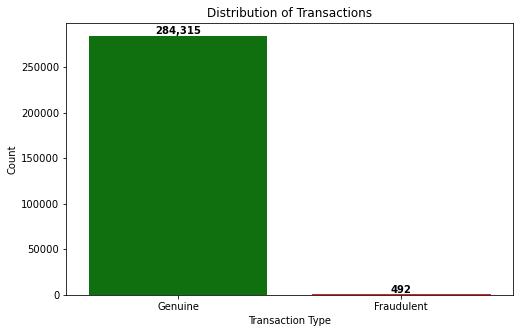

In [20]:
# Plot the countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Class', palette=['green', 'red'])
plt.title('Distribution of Transactions')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])  # Set custom labels
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Annotate each bar with count
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


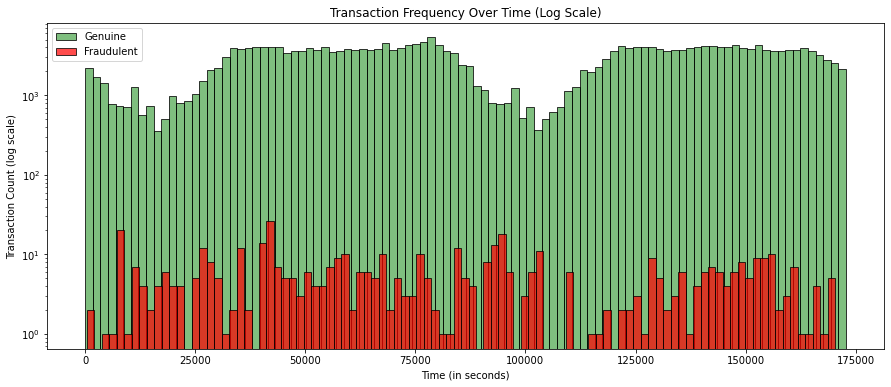

In [21]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df[df['Class'] == 0], x='Time', bins=100, label='Genuine', color='green', alpha=0.5)
sns.histplot(data=df[df['Class'] == 1], x='Time', bins=100, label='Fraudulent', color='red', alpha=0.7)
plt.yscale('log')  # Apply log scale
plt.title('Transaction Frequency Over Time (Log Scale)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Count (log scale)')
plt.legend()
plt.show()

To further explore the temporal behavior of transactions, we separate the frequency of legitimate and fraudulent transactions into two subplots. This allows for a more precise visual comparison of when these transactions occur over the same time scale.

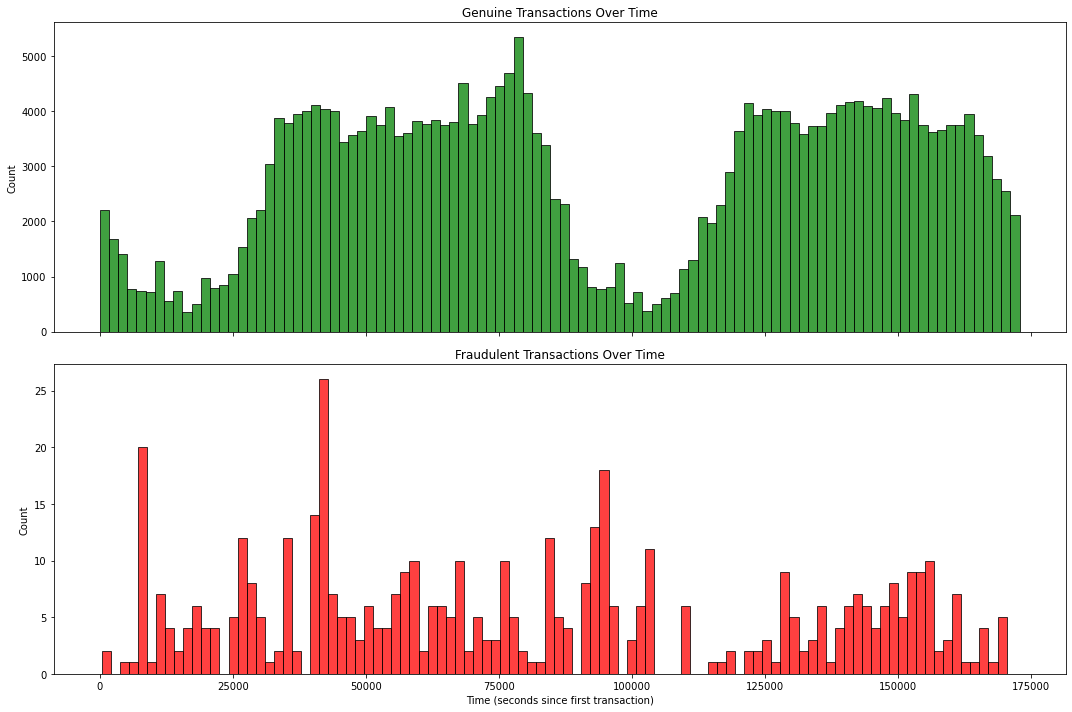

In [22]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Genuine transactions
sns.histplot(data=df[df['Class'] == 0], x='Time', bins=100, color='green', ax=axes[0])
axes[0].set_title('Genuine Transactions Over Time')
axes[0].set_ylabel('Count')

# Fraudulent transactions
sns.histplot(data=df[df['Class'] == 1], x='Time', bins=100, color='red', ax=axes[1])
axes[1].set_title('Fraudulent Transactions Over Time')
axes[1].set_xlabel('Time (seconds since first transaction)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

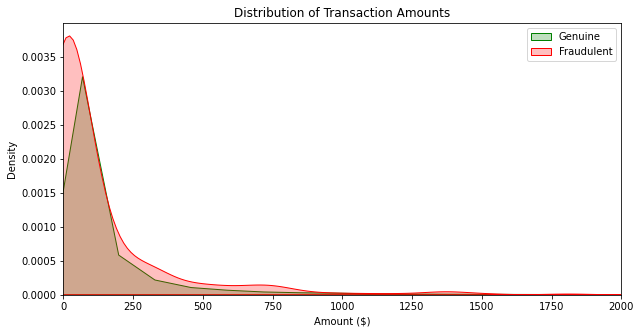

In [23]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['Class'] == 0], x='Amount', label='Genuine', fill=True, color='green')
sns.kdeplot(data=df[df['Class'] == 1], x='Amount', label='Fraudulent', fill=True, color='red')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 2000)  # Optional: limit axis to focus on normal range
plt.show()

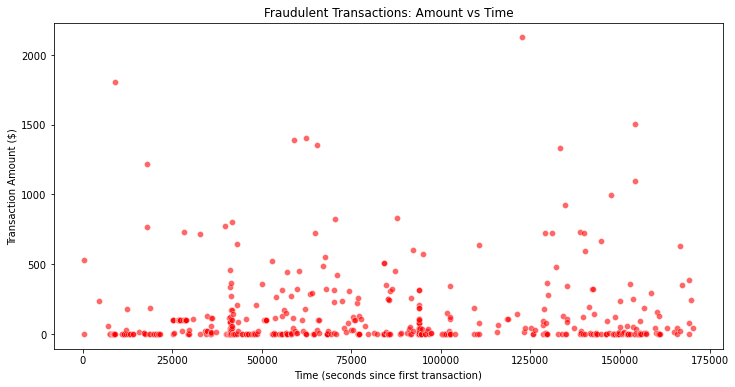

In [24]:
# Filter only fraudulent transactions
fraud_df = df[df['Class'] == 1]

# Scatter plot of Amount vs Time for fraudulent transactions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=fraud_df, x='Time', y='Amount', color='red', alpha=0.6)
plt.title('Fraudulent Transactions: Amount vs Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Transaction Amount ($)')
plt.show()

To gain deeper insights into which features are most associated with fraudulent activity, we compute the correlation between each feature and the target variable 'Class'. This analysis reveals the strength and direction of the relationship between features and fraud, helping us understand which variables are most relevant for predicting fraudulent transactions.

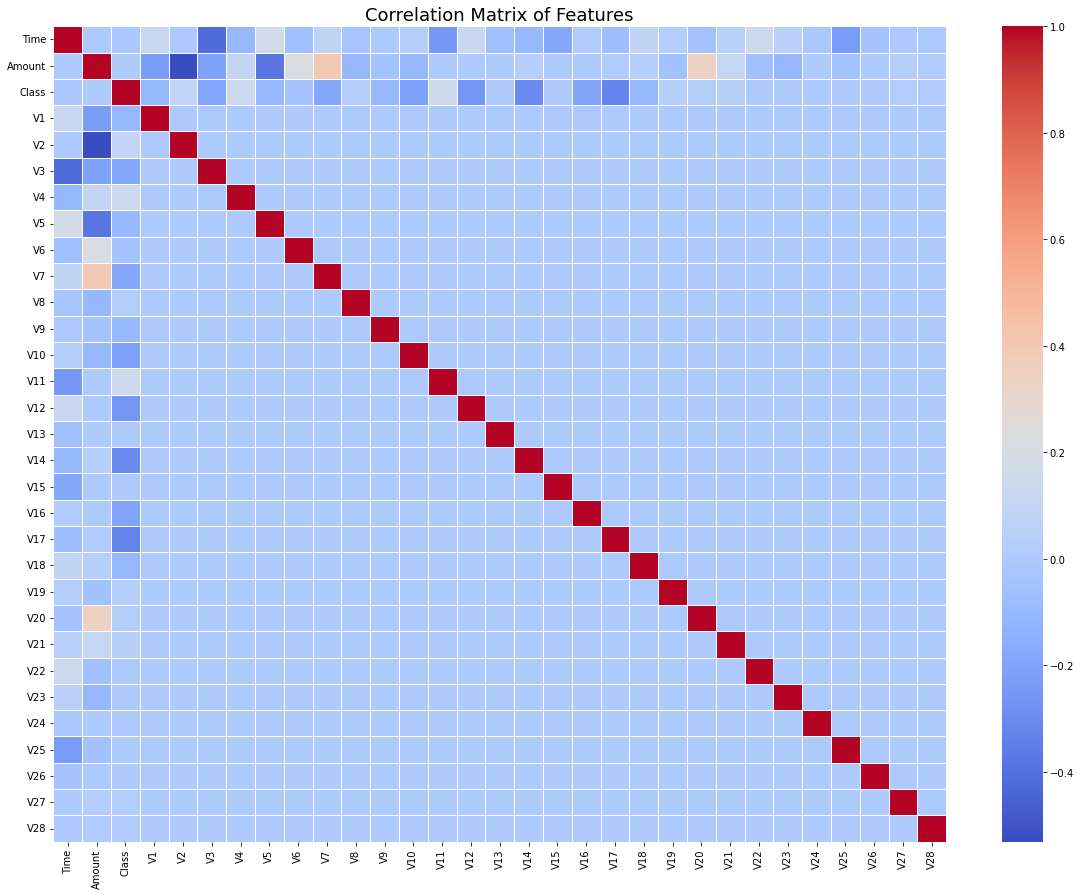

In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.show()

In [26]:
# Correlation of all features with 'Class'
correlation_with_class = corr_matrix['Class'].sort_values(ascending=False)
print(correlation_with_class)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


The analysis revealed several features with noteworthy correlation values:

V11 (0.15) and V4 (0.13) exhibit positive correlations with fraud.

V17 (-0.32), V14 (-0.30), and V12 (-0.26) show strong negative correlations with fraud.

These features are likely to be important in the modeling phase, as they capture patterns that differentiate fraudulent from legitimate transactions. 

To further investigate the most relevant features identified in the correlation analysis, we compare their distributions across both transaction classes: Class 0 (Legitimate) and Class 1 (Fraudulent). This visualization helps us observe how these variables behave differently in fraudulent versus non-fraudulent transactions.

We use Seaborn's kdeplot to visualize the probability density function of each feature for both classes. We focus on the four most correlated features: V11, V17, V14, and V4.

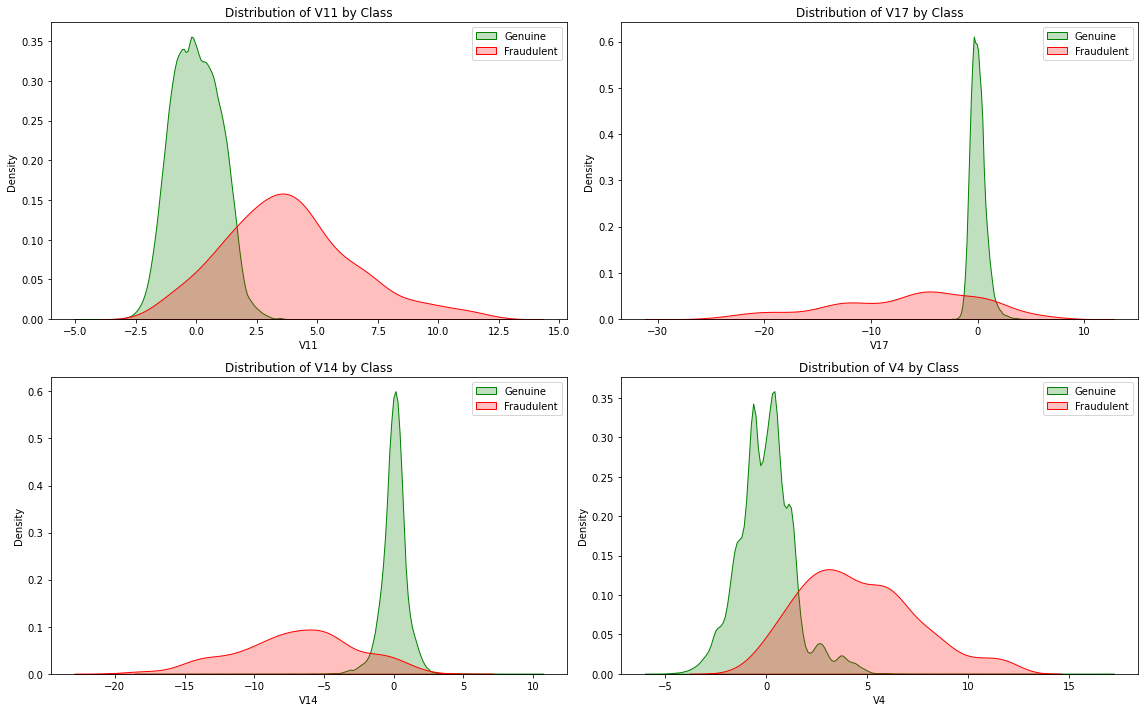

In [27]:
# Select most correlated features
top_features = ['V11', 'V17', 'V14', 'V4']

# Plot the distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df[df['Class'] == 0], x=feature, label='Genuine', fill=True, color='green')
    sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraudulent', fill=True, color='red')
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()

plt.tight_layout()
plt.show()

In these plots:

The green curves represent how the feature is distributed in legitimate transactions.

The red curves show the distribution in fraudulent transactions.

These visualizations make it evident that some features (such as V17 and V14) display clear distributional differences between the two classes. This suggests that they carry discriminative power, making them valuable inputs for the predictive model.

## 5.3 Scaling

Before training machine learning models, it is essential to normalize the dataset to ensure that all features contribute equally to the analysis. This is particularly important for algorithms that are sensitive to the scale of data, such as Logistic Regression, k-Nearest Neighbors (k-NN), and Support Vector Machines (SVM).

The dataset contains numerical values with different ranges, such as the Amount feature, which varies widely and could disproportionately influence the model's learning process. Therefore, we apply standardization using StandardScaler, which transforms the features to have a mean of 0 and a standard deviation of 1.

We will normalize only the Amount and Time features, since the rest of the variables (V1 to V28) have already been transformed via PCA and are already scaled.

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe to keep original intact
df_normalized = df.copy()

# Initialize the scaler
scaler = StandardScaler()

# Normalize 'Amount' and 'Time'
df_normalized[['Amount', 'Time']] = scaler.fit_transform(df_normalized[['Amount', 'Time']])

The Amount feature represents the monetary value of each transaction and can vary significantly, from just a few cents to several thousands. This wide range can pose a problem for many machine learning algorithms, such as Logistic Regression, SVM, and k-NN, which are sensitive to the scale of input features. Without normalization, the model might mistakenly give more importance to Amount simply due to its larger numeric values, not because it carries more predictive power.

Similarly, the Time feature indicates the number of seconds elapsed since the first transaction in the dataset. While it increases continuously, its raw values do not carry intrinsic meaning on their own. What matters is how Time relates to other factors and patterns in the data. By normalizing Time, we ensure it is on a comparable scale with the rest of the features, improving the model’s ability to learn from the data effectively.

In [29]:
# Check mean and std after scaling
print("Mean of Amount:", df_normalized['Amount'].mean())
print("Std of Amount:", df_normalized['Amount'].std())
print("Mean of Time:", df_normalized['Time'].mean())
print("Std of Time:", df_normalized['Time'].std())

Mean of Amount: 3.202236423019539e-16
Std of Amount: 1.0000017555792826
Mean of Time: -1.0503786406559267e-14
Std of Time: 1.0000017555794558


At this point, the dataset is fully normalized and ready for the next stage of the project: model training and evaluation.
By standardizing Time and Amount, we bring all features to a comparable scale, allowing the machine learning algorithms to better learn from the underlying patterns in the data without being biased by numerical disparities.

# 5. Machine Learning

Since the dataset is highly imbalanced—with a significantly larger number of genuine transactions compared to fraudulent ones—it is crucial to maintain the class distribution when splitting the data into training and testing sets. To achieve this, we use the stratify parameter during the split, ensuring that both sets retain the same proportion of fraudulent and non-fraudulent transactions.

We will allocate 80% of the data for training and the remaining 20% for testing.

In [30]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Proportion of frauds in y_train:", y_train.mean())
print("Proportion of frauds in y_test:", y_test.mean())

Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)
Proportion of frauds in y_train: 0.001729245759178389
Proportion of frauds in y_test: 0.0017204452090867595


After performing the stratified train-test split, the resulting data shapes are as follows:

**Training set:** 227,845 samples with 30 features

**Testing set:** 56,962 samples with 30 features

In terms of class distribution, both subsets preserve the original imbalance ratio:

**Fraudulent transactions in training set:** approximately 0.17%

**Fraudulent transactions in test set:** approximately 0.17%

This confirms that the use of stratify=y during the split was effective. Maintaining the same class proportion in both the training and testing sets is essential when dealing with highly imbalanced datasets, as it ensures that the evaluation metrics accurately reflect the model’s performance on both fraudulent and legitimate transactions.

## 5.1 Oversampling 

After splitting the dataset, and prior to training, it is essential to address the issue of class imbalance. Since fraudulent transactions represent a very small fraction of the total data, training a model on this imbalanced dataset could result in poor detection performance for the minority class.

To improve the model’s ability to learn from the minority class (fraudulent transactions), a balancing technique will be applied only to the training set. This approach avoids introducing bias into the evaluation process and ensures that the test set remains a realistic representation of real-world class distributions.

By rebalancing the training data, we aim to enhance the model's sensitivity to fraudulent patterns and improve its overall classification performance.

It is crucial to apply resampling techniques only after splitting the dataset, and exclusively on the training set. Applying balancing methods before the split would artificially modify the class distribution in the test set. As a result, the test set would no longer reflect the natural imbalance found in real-world scenarios.

This would lead to an overly optimistic evaluation of the model’s performance, since it would be tested on data that does not represent the actual distribution of fraudulent vs. legitimate transactions. Therefore, by preserving the original class imbalance in the test set, we ensure a more accurate and realistic assessment of the model’s generalization ability.

In [31]:
!pip install imbalanced-learn

In this dataset, only approximately 0.17% of the transactions are labeled as fraudulent. This indicates a highly imbalanced scenario where, on average, there is only one fraudulent transaction for every 500 legitimate ones. Such imbalance poses a significant challenge to machine learning models, which may become biased toward the majority class and fail to effectively detect fraud.

To address this issue, two main resampling strategies can be considered: oversampling and undersampling.

Oversampling, such as the Synthetic Minority Over-sampling Technique (SMOTE), involves generating synthetic examples for the minority class. This method has several advantages: it preserves all the legitimate transactions, performs well in extreme imbalance cases, and is suitable when each instance may contain valuable information. However, it can lead to overfitting and increases the size of the training dataset, resulting in longer training times.

On the other hand, undersampling reduces the number of majority class samples. While it is faster and simpler to implement, it carries the risk of discarding a large number of legitimate transactions, potentially removing important information from the dataset.

Given the nature of this dataset—where fraudulent samples are extremely rare and each transaction may hold critical signals—the recommended approach is to use oversampling with SMOTE. This method allows us to generate new, realistic fraudulent transactions while retaining the integrity and richness of the original legitimate data.

In [32]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificamos la nueva forma y distribución
print("Original X_train shape:", X_train.shape)
print("Resampled X_train shape:", X_train_resampled.shape)

print("Original class distribution in y_train:\n", y_train.value_counts())
print("Resampled class distribution in y_train_resampled:\n", y_train_resampled.value_counts())

Original X_train shape: (227845, 30)
Resampled X_train shape: (454902, 30)
Original class distribution in y_train:
 0    227451
1       394
Name: Class, dtype: int64
Resampled class distribution in y_train_resampled:
 0    227451
1    227451
Name: Class, dtype: int64


Before applying SMOTE, the training dataset was highly imbalanced, containing 227,451 legitimate transactions and only 394 fraudulent transactions. This imbalance posed a serious challenge for any model trying to learn meaningful patterns related to fraud detection.

After applying SMOTE, the number of fraudulent samples was synthetically increased to match the number of legitimate ones. As a result, the training set is now perfectly balanced, with 227,451 samples in each class. This balance significantly improves the model’s ability to learn from both classes and enhances its capacity to detect fraudulent transactions more effectively.

## 5.2 Logistic Regression

The first classification model applied in this project is Logistic Regression, a linear algorithm commonly used for binary classification tasks. Its main objective is to estimate the probability that a given transaction belongs to the fraudulent class (label 1) or the legitimate class (label 0), based on the input features.

Since the training dataset was previously balanced using SMOTE, Logistic Regression now has a more robust foundation to learn from both classes. This significantly enhances the model’s capacity to recognize subtle patterns associated with fraudulent behavior, while avoiding bias toward the majority class.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
#Create and train the model using the resampled data
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [35]:
#Predict on the original test set
y_pred = model.predict(X_test)
#Evaluate the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Genuine", "Fraudulent"]))

Confusion Matrix:
 [[55912   952]
 [    9    89]]

Classification Report:
               precision    recall  f1-score   support

     Genuine       1.00      0.98      0.99     56864
  Fraudulent       0.09      0.91      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



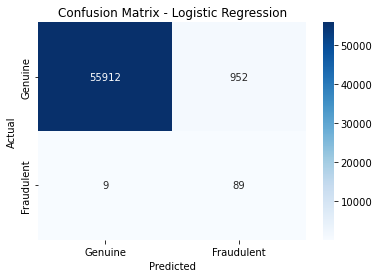

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the original test set using Logistic Regression model
y_pred_logreg = model.predict(X_test)

# Generate confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Despite applying SMOTE to balance the classes in the training set, the logistic regression model still reflects some of the challenges associated with the original dataset's extreme class imbalance.

The recall for the fraudulent class is quite high (0.91), which is a good sign, as it means the model is successfully identifying most of the actual fraud cases. However, the precision is very low (0.09), indicating that many legitimate transactions are being incorrectly classified as fraudulent — resulting in a high number of false positives.

This outcome suggests that, although SMOTE helped the model to better learn the minority class, it is still sensitive to the original imbalance. This can have negative consequences in a real-world scenario, where a high number of false alarms could lead to unnecessary costs or reduced trust in the fraud detection system.

## *Adjustment in Logistic Regression

In default settings, classifiers such as LogisticRegression predict a transaction as fraudulent (class 1) when the predicted probability exceeds 0.5. However, this threshold is not always optimal, especially in cases where the target class (fraudulent transactions) is highly imbalanced.

In this context, lowering the decision threshold to, for instance, 0.3 means that any transaction with a probability greater than 30% will be classified as fraudulent. This adjustment leads to an increase in recall, improving the model's ability to detect actual frauds. However, this comes at the cost of a decrease in precision, as more legitimate transactions may be incorrectly labeled as fraudulent.

Given the nature of fraud detection, where it is often more critical to identify as many fraudulent transactions as possible (even if it results in some false positives), threshold adjustment offers a valuable tool. It allows for better control over the trade-off between recall and precision, ensuring the model aligns more closely with the business goals.

In [37]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report

# Get the predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (fraudluent transa)

# Probar con un umbral más bajo
threshold = 0.3
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Show results
print("Confusion Matrix with threshold =", threshold)
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted, target_names=['Genuine', 'Fraudulent']))

Confusion Matrix with threshold = 0.3
[[54888  1976]
 [    9    89]]

Classification Report:
              precision    recall  f1-score   support

     Genuine       1.00      0.97      0.98     56864
  Fraudulent       0.04      0.91      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962



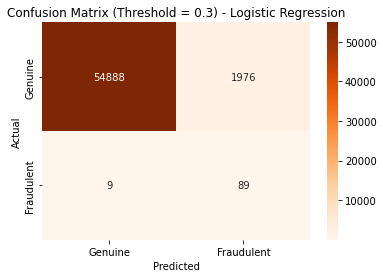

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Genuine', 'Fraudulent'],
            yticklabels=['Genuine', 'Fraudulent'])
plt.title(f'Confusion Matrix (Threshold = {threshold}) - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The adjustment of the decision threshold had significant effects on the model's performance:

• By adjusting the threshold, the recall for fraudulent transactions increased to 0.91. This indicates that the model is now effectively identifying the majority of fraudulent transactions, which is crucial in fraud detection.

•The precision decreased, meaning that more legitimate transactions are being mistakenly flagged as fraudulent (false positives).

In a real-world banking environment, this trade-off may be acceptable if the cost of false positives is low. For example, if false positives can be addressed through a manual review process or a follow-up call to the customer, the potential cost is mitigated. In contrast, false negatives, where fraudulent transactions go undetected, could have significant financial and reputational consequences. Thus, in such a scenario, prioritizing recall over precision may be a rational decision, ensuring that fewer frauds are overlooked at the expense of some extra investigation into legitimate transactions.

# 5.3 Random Forest

The Random Forest algorithm is a powerful and widely-used model, particularly well-suited for classification tasks.
It is highly resistant to noise and performs well even with imbalanced classes, the model requires minimal parameter tuning, making it accessible and effective out of the box, compatibility with Oversampling. Random Forest works well when combined with oversampling techniques like SMOTE, helping to improve performance on imbalanced datasets.

Random Forest is a reliable base model that can serve as a strong starting point for predictive analysis, especially when dealing with complex datasets like fraud detection.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["Genuine", "Fraudulent"]))

Confusion Matrix (Random Forest):
[[56849    15]
 [   17    81]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.84      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



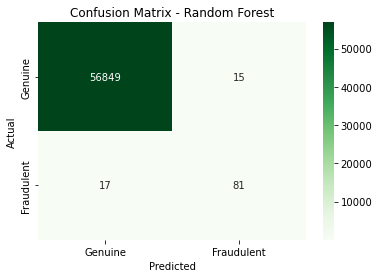

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model achieved an accuracy of 1.00 (or 100%), meaning it correctly classified all but 32 transactions out of 56,962:

• 15 genuine transactions were incorrectly labeled as fraud.

• 17 fraudulent transactions were incorrectly classified as genuine.

Although the accuracy appears high, it can be misleading in cases with highly imbalanced classes, such as this one. In fraud detection, the priority is to focus on metrics like precision, recall, and F1-score for the "Fraudulent" class, rather than the overall accuracy. This is because the primary objective is to detect as many fraudulent transactions as possible, even if it means a few more legitimate transactions are misclassified.

# 5.4 LightGBM

LightGBM is a highly efficient machine learning model, recognized for its speed and performance, particularly when dealing with large datasets.

LightGBM is known for its exceptional speed, making it an ideal choice for large-scale datasets, includes optimizations that make it more time- and memory-efficient and supports class weighting or internal balancing, which is crucial for dealing with highly imbalanced datasets.

Due to its speed, efficiency, and ability to handle imbalanced data, LightGBM is a great option for classification problems, especially in contexts like credit card fraud detection.

In [41]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [42]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Training the model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting
y_pred_lgb = lgb_model.predict(X_test)


print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb, target_names=["Genuine", "Fraudulent"]))

# Accuracy
print("\nAccuracy (LightGBM):", accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.216117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix (LightGBM):
[[56809    55]
 [   17    81]]

Classification Report (LightGBM):
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.60      0.83      0.69        98

    accuracy                           1.00     56962
   macro avg       0.80      0.91      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy (LightGBM): 0.998735999438222


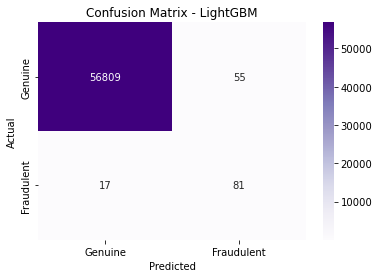

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Getting the confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples', xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

The LightGBM model achieved an excellent recall (similar to Random Forest), meaning it was very effective at identifying fraudulent transactions. However, it had a slightly lower precision compared to Random Forest, indicating that while it detected a good number of frauds, it also produced more false positives than RF.

This trade-off between recall and precision is common in imbalanced datasets, especially for fraud detection, where maximizing recall is often more important to avoid missing fraudulent transactions.

## Comparison of Models Performance

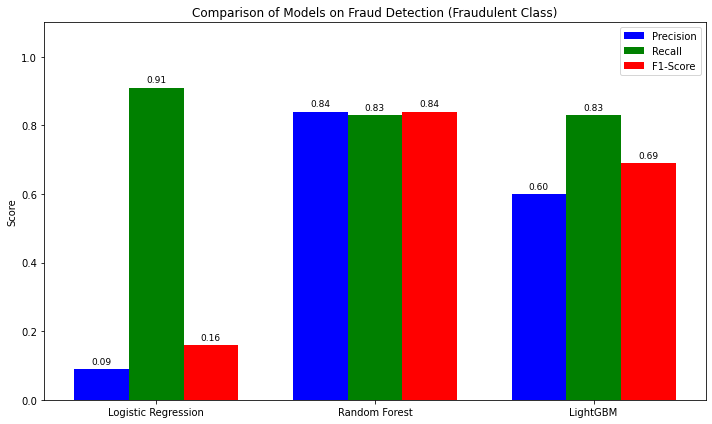

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Metrcis for "Fraudulent" class
model_names = ['Logistic Regression', 'Random Forest', 'LightGBM']
precision_scores = [0.09, 0.84, 0.60]
recall_scores = [0.91, 0.83, 0.83]
f1_scores = [0.16, 0.84, 0.69]

x = np.arange(len(model_names))  
width = 0.25  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision_scores, width, label='Precision', color='blue')
bars2 = ax.bar(x, recall_scores, width, label='Recall', color='green')
bars3 = ax.bar(x + width, f1_scores, width, label='F1-Score', color='red')

# Tags and format
ax.set_ylabel('Score')
ax.set_title('Comparison of Models on Fraud Detection (Fraudulent Class)')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.set_ylim([0, 1.1])  # Escala hasta 1.1 para claridad

# Code to show values in the graphic
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.tight_layout()
plt.show()

We now proceed to the visualization phase starting with the ROC curve which allows for a comparative evaluation of the three models by illustrating their ability to distinguish between fraudulent and legitimate transactions across various classification thresholds followed by the Precision Recall curve which offers a complementary perspective by focusing on the tradeoff between precision and recall particularly relevant in the context of imbalanced datasets such as fraud detection where accurate identification of minority class instances is critical.

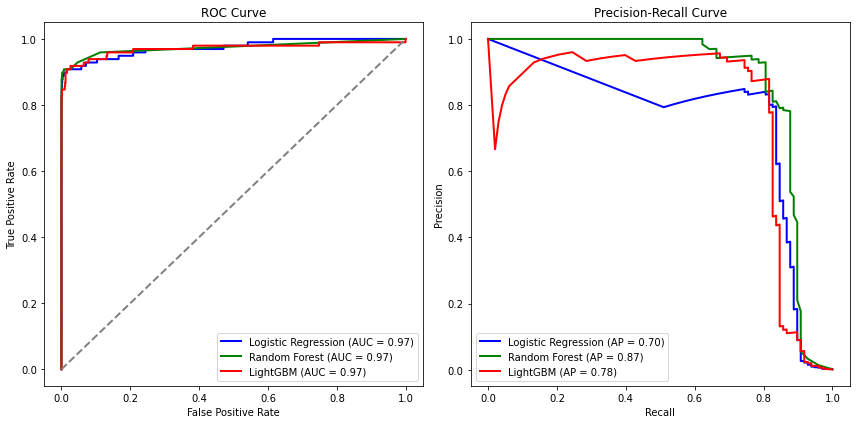

In [45]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Obtener las probabilidades para la clase 1 (fraudulenta)
y_proba_lr = model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Curva Precision-Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_proba_lgb)

average_precision_lr = average_precision_score(y_test, y_proba_lr)
average_precision_rf = average_precision_score(y_test, y_proba_rf)
average_precision_lgb = average_precision_score(y_test, y_proba_lgb)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lgb, tpr_lgb, color='red', lw=2, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label=f'Logistic Regression (AP = {average_precision_lr:.2f})')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.plot(recall_lgb, precision_lgb, color='red', lw=2, label=f'LightGBM (AP = {average_precision_lgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


This analysis compares the performance of Logistic Regression, Random Forest, and LightGBM by examining their AUC scores on the ROC curve to determine which model best balances the classification of fraudulent and legitimate transactions, while the Precision-Recall curve provides deeper insight into how each model handles the minority class in an imbalanced dataset, making it a key metric for evaluating fraud detection effectiveness and guiding model selection.

# Conclusions 

1. The dataset is highly imbalanced, with a vast majority of genuine transactions and a minimal number of fraudulent ones. This is common in fraud detection problems, as frauds are rare events.

2. Logistic Regression:

    • Good general accuracy, but low recall for the fraudulent class, meaning it missed many fraudulent transactions by misclassifying them as genuine.

    • Adjusting the decision threshold improved recall but lowered precision, highlighting the trade-off between precision and recall in imbalanced classification problems.

3. Random Forest:

    • Performed excellently with high precision and recall for the genuine class, and a reasonable balance in detecting frauds (though not perfect).

     •Although the precision was high, some false negatives (undetected frauds) persisted, which is concerning for critical fraud detection applications.

4. LightGBM:

    •Delivered impressive performance with high precision and recall for genuine transactions and decent fraud detection performance.

    • LightGBM is an advanced model that handles imbalanced datasets well due to internal optimizations.

5. Lowering the prediction threshold, for example from 0.5 to 0.3, improved recall for the fraudulent class but sacrificed precision. This is crucial in fraud detection, as tolerating some false positives (legitimate transactions misclassified as fraud) can prevent missing real frauds.

6. The ROC curve shows how well models can distinguish between classes, while the Precision-Recall curve is more useful for evaluating fraud detection performance due to the imbalanced nature of the dataset. LightGBM and Random Forest showed the best results in both curves, making them the most suitable models for this task.

7. Despite high model precision, recall for the fraudulent class is critical. A low recall means many frauds are not detected, which is unacceptable in real-world fraud detection. By adjusting the classification threshold, applying SMOTE, and selecting models like Random Forest and LightGBM, better fraud detection can be achieved, though precision may always be a trade-off.